In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [82]:
data = pd.read_csv("../../data/lunar_point_cloud.csv")

In [83]:
data

,x,y,z,theta,omega
0,0.000,0.000,374.000,0.000,0.087
1,0.000,0.000,0.000,0.000,0.000
2,-0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.052
4,-0.000,0.000,917.000,0.000,0.087
...,...,...,...,...,...
995,-0.000,0.000,0.000,0.279,2.409
996,36.666,33.014,172.066,0.279,2.409
997,-0.000,0.000,0.000,0.279,2.443
998,-27.450,23.033,124.964,0.279,2.443


AttributeError: module 'matplotlib.pyplot' has no attribute 'sho'

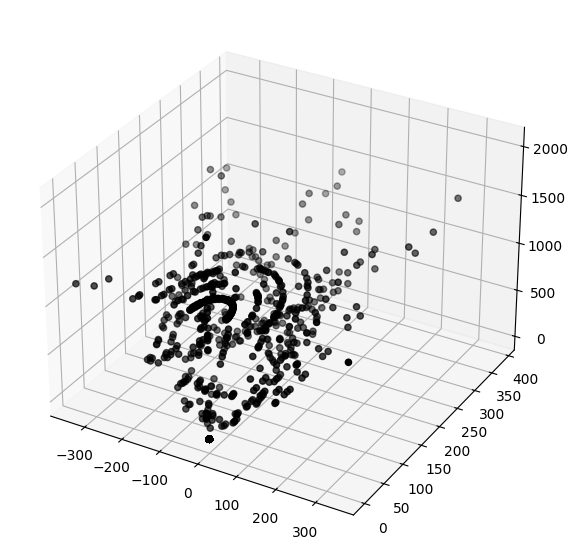

In [84]:

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(data['x'], data['y'], data['z'], color='black')
plt.sho()

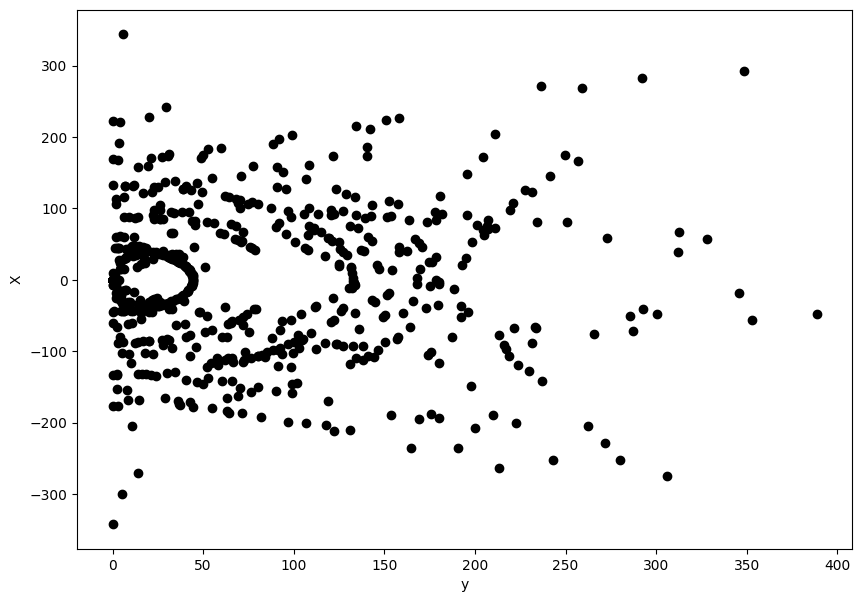

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['y'], data['x'], color='black')
plt.xlabel('y')
plt.ylabel('X')
plt.show()


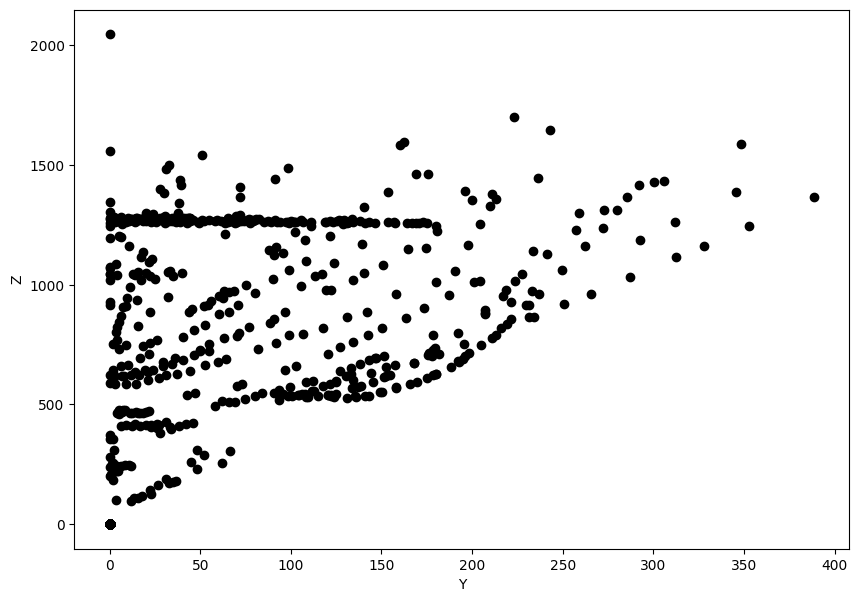

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['y'], data['z'], color='black')
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()


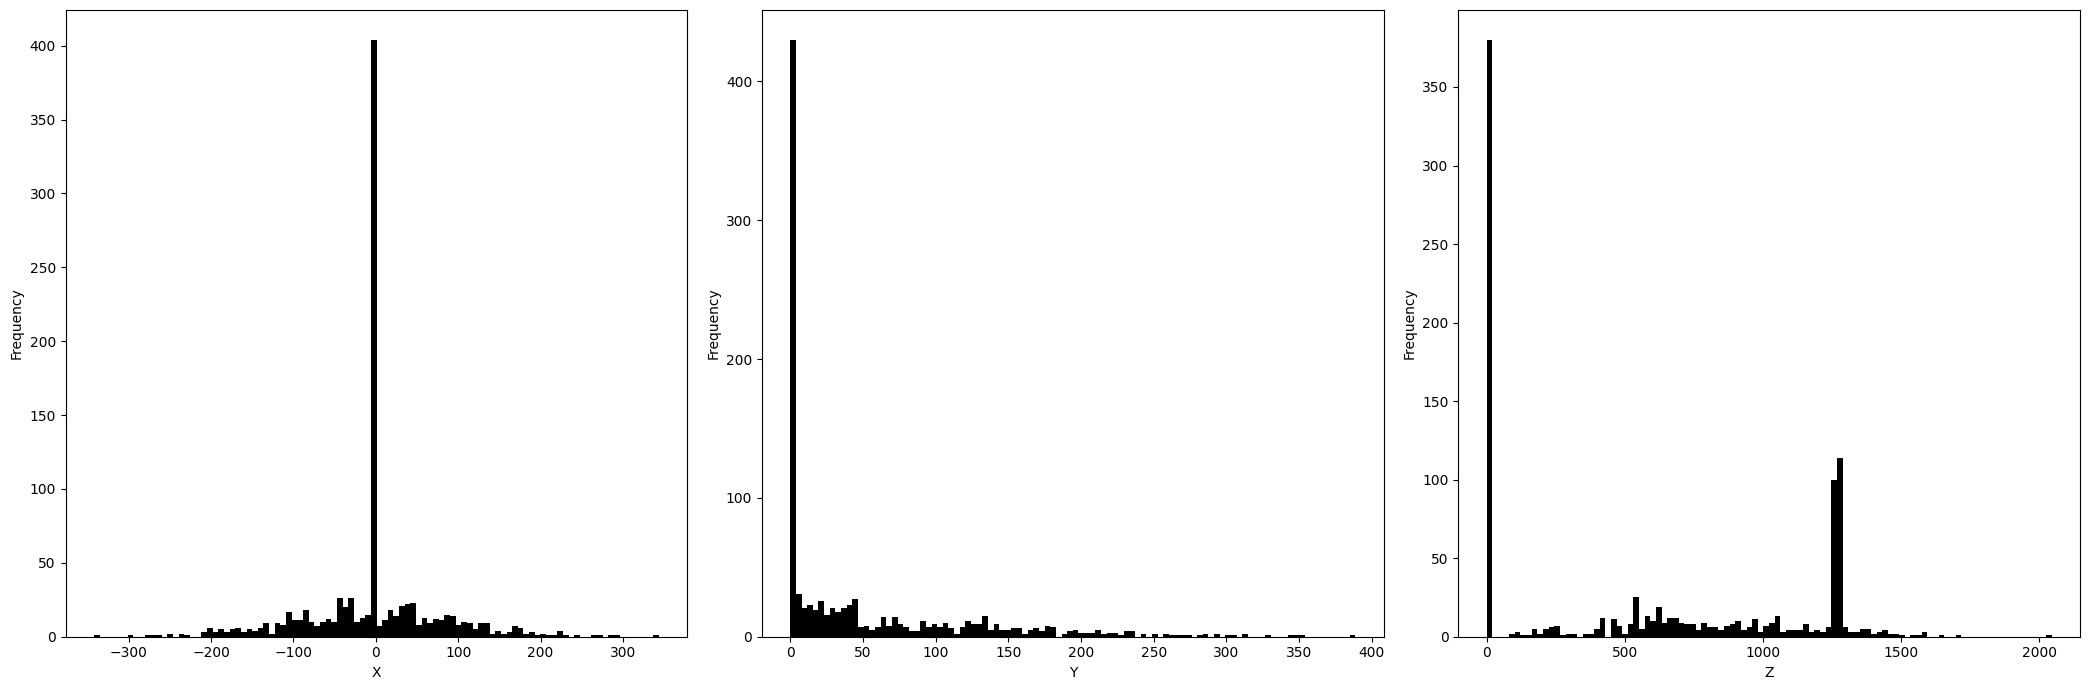

In [ ]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
plt.hist(data['x'], bins=100, color='black')
plt.xlabel('X')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['y'], bins=100, color='black')
plt.xlabel('Y')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['z'], bins=100, color='black')
plt.xlabel('Z')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
data['theta'].head(980)

0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
975    0.279
976    0.279
977    0.279
978    0.279
979    0.279
Name: theta, Length: 980, dtype: float64